<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_DL/blob/main/CaiCai_DL_Week5.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Sigmoid函数的梯度计算问题**

In [ ]:
import torch
from torch import nn,optim
import matplotlib.pyplot as plt

In [ ]:
X = torch.arange(-5,5,0.1)
X.requires_grad = True
sigmoid_y = torch.sigmoid(X)

In [ ]:
sigmoid_y.sum().backward()

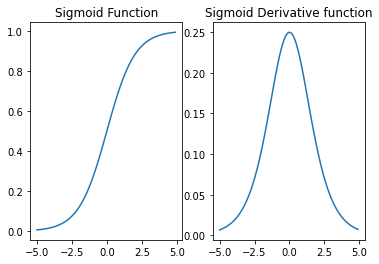

In [ ]:
plt.subplot(121)
plt.plot(X.detach(),sigmoid_y.detach())
plt.title("Sigmoid Function")
plt.subplot(122)
plt.plot(X.detach(),X.grad.detach())
plt.title("Sigmoid Derivative function");

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/week4_function")
from torchLearning import *

In [ ]:
torch.manual_seed(420)

features,labels = tensorGenReg(w=[2,-1],bias=True,deg=2)

train_loader,test_loader = split_loader(features,labels)

In [ ]:
torch.manual_seed(420)

sigmoid_model3 = Sigmoid_class3()

In [ ]:
p1 = list(sigmoid_model3.parameters())
p1

[Parameter containing:
 tensor([[ 0.4318, -0.4256],
         [ 0.6730, -0.5617],
         [-0.2157, -0.4873],
         [ 0.5453,  0.2653]], requires_grad=True), Parameter containing:
 tensor([-0.3527, -0.5469, -0.4094, -0.1364], requires_grad=True), Parameter containing:
 tensor([1., 1., 1., 1.], requires_grad=True), Parameter containing:
 tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
 tensor([[-0.2552,  0.3644, -0.2104, -0.3271],
         [-0.1542, -0.4883, -0.2428, -0.2728],
         [ 0.1076,  0.4066,  0.0540, -0.2914],
         [ 0.2058, -0.2129, -0.2367, -0.0958]], requires_grad=True), Parameter containing:
 tensor([-0.2609,  0.0550,  0.4059,  0.0682], requires_grad=True), Parameter containing:
 tensor([1., 1., 1., 1.], requires_grad=True), Parameter containing:
 tensor([0., 0., 0., 0.], requires_grad=True), Parameter containing:
 tensor([[ 3.0199e-01, -4.3436e-01, -3.9335e-01, -6.6525e-02],
         [ 4.5806e-04,  3.1209e-01, -4.3974e-01,  2.0861e-01],
     

In [ ]:
f = torch.tensor([[1.,2]])
sigmoid_model3(f)

tensor([[-0.5715]], grad_fn=<AddmmBackward0>)

In [ ]:
ml= list(sigmoid_model3.modules())
list(ml[1].parameters())  # 适合对数据的所有参数比较适用

[Parameter containing:
 tensor([[ 0.4318, -0.4256],
         [ 0.6730, -0.5617],
         [-0.2157, -0.4873],
         [ 0.5453,  0.2653]], requires_grad=True), Parameter containing:
 tensor([-0.3527, -0.5469, -0.4094, -0.1364], requires_grad=True)]

In [ ]:
ml[1].weight, ml[1].bias 

(Parameter containing:
 tensor([[ 0.4318, -0.4256],
         [ 0.6730, -0.5617],
         [-0.2157, -0.4873],
         [ 0.5453,  0.2653]], requires_grad=True), Parameter containing:
 tensor([-0.3527, -0.5469, -0.4094, -0.1364], requires_grad=True))

In [ ]:
list(sigmoid_model3.modules())[1](f)  # 返回模型第一层输出结果

tensor([[-0.7721, -0.9973, -1.5997,  0.9395]], grad_fn=<AddmmBackward0>)

In [ ]:
torch.mm(f,p1[0].t()) + p1[1].t()  # 矩阵需要转置parameters中的权重矩阵

tensor([[-0.7721, -0.9973, -1.5997,  0.9395]], grad_fn=<AddBackward0>)

In [ ]:
for m in sigmoid_model3.modules():
  if isinstance(m,nn.Linear):
    print(m.weight)   # 各个层之间的权重值

Parameter containing:
tensor([[ 0.4318, -0.4256],
        [ 0.6730, -0.5617],
        [-0.2157, -0.4873],
        [ 0.5453,  0.2653]], requires_grad=True)
Parameter containing:
tensor([[-0.2552,  0.3644, -0.2104, -0.3271],
        [-0.1542, -0.4883, -0.2428, -0.2728],
        [ 0.1076,  0.4066,  0.0540, -0.2914],
        [ 0.2058, -0.2129, -0.2367, -0.0958]], requires_grad=True)
Parameter containing:
tensor([[ 3.0199e-01, -4.3436e-01, -3.9335e-01, -6.6525e-02],
        [ 4.5806e-04,  3.1209e-01, -4.3974e-01,  2.0861e-01],
        [-4.2916e-01,  8.0655e-02,  3.3044e-01,  6.8971e-02],
        [ 1.5964e-01,  3.1789e-01,  4.9465e-01, -3.1377e-01]],
       requires_grad=True)
Parameter containing:
tensor([[-0.3468, -0.4897,  0.2213,  0.4947]], requires_grad=True)


In [ ]:
fit(net=sigmoid_model3,
  criterion=nn.MSELoss(),
  optimizer=optim.SGD(sigmoid_model3.parameters(),lr=0.03),
  batchdata=train_loader,
  epochs=5)

In [ ]:
for m in sigmoid_model3.modules():
  if isinstance(m,nn.Linear):
    print(m.weight)

Parameter containing:
tensor([[ 0.4357, -0.4260],
        [ 0.7099, -0.5654],
        [-0.2172, -0.4865],
        [ 0.5492,  0.2803]], requires_grad=True)
Parameter containing:
tensor([[-0.2606,  0.3550, -0.2129, -0.3310],
        [-0.1453, -0.4643, -0.2409, -0.2757],
        [ 0.1391,  0.4738,  0.0635, -0.2822],
        [ 0.1943, -0.2343, -0.2410, -0.1027]], requires_grad=True)
Parameter containing:
tensor([[ 0.2688, -0.4683, -0.4468, -0.1076],
        [-0.0468,  0.2679, -0.5163,  0.1525],
        [-0.4125,  0.0575,  0.3616,  0.0668],
        [ 0.2008,  0.3056,  0.5667, -0.2936]], requires_grad=True)
Parameter containing:
tensor([[ 0.0017, -0.0855,  0.6482,  0.8358]], requires_grad=True)


In [ ]:
for m in sigmoid_model3.modules():
  if isinstance(m,nn.Linear):
    print(m.weight.grad)

tensor([[-2.5572e-03, -2.9124e-04],
        [-1.5477e-02, -2.2769e-03],
        [-2.3698e-03,  2.8652e-05],
        [ 9.3375e-03, -1.5299e-03]])
tensor([[ 0.0028,  0.0040, -0.0004,  0.0034],
        [-0.0083, -0.0122,  0.0016, -0.0099],
        [-0.0235, -0.0343,  0.0040, -0.0284],
        [ 0.0077,  0.0111, -0.0011,  0.0094]])
tensor([[ 8.6394e-05,  1.4499e-05,  1.7788e-04,  9.4201e-05],
        [ 2.9233e-03,  4.8348e-04,  6.0220e-03,  3.1860e-03],
        [-1.9596e-02, -2.9274e-03, -4.0515e-02, -2.1293e-02],
        [-2.6658e-02, -4.1402e-03, -5.5041e-02, -2.8999e-02]])
tensor([[-0.1477, -0.1638, -0.2055, -0.1704]])


In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
vp = []
for i,m in enumerate(sigmoid_model3.modules()):
  if isinstance(m,nn.Linear):
    vp_x = m.weight.grad.detach().reshape(-1,1).numpy()
    vp_y = np.full_like(vp_x,i)
    vp_a = np.concatenate((vp_x,vp_y),1)
    vp.append(vp_a)

[Text(0.5, 0, 'num_hidden'), Text(0.5, 1.0, 'Gradients')]

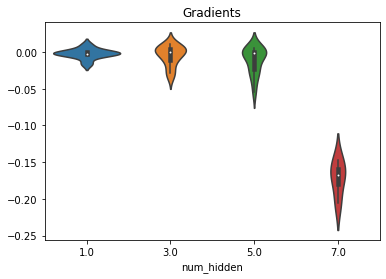

In [ ]:
vp_r = np.concatenate(vp,0)
ax = sns.violinplot(y=vp_r[:,0],x=vp_r[:,1])
ax.set(xlabel="num_hidden",title="Gradients");

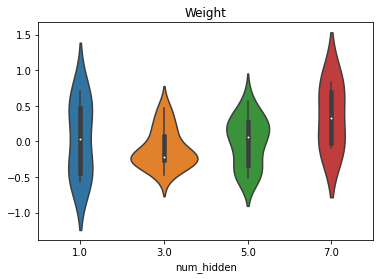

In [ ]:
vp = []
for i,m in enumerate(sigmoid_model3.modules()):
  if isinstance(m,nn.Linear):
    vp_x = m.weight.detach().reshape(-1,1).numpy()
    vp_y = np.full_like(vp_x,i)
    vp_a = np.concatenate((vp_x,vp_y),1)
    vp.append(vp_a)
vp_r = np.concatenate(vp,0)
ax = sns.violinplot(y=vp_r[:,0],x=vp_r[:,1])
ax.set(xlabel="num_hidden",title="Weight");

In [ ]:
fit(net=sigmoid_model3,
  criterion=nn.MSELoss(),
  optimizer=optim.SGD(sigmoid_model3.parameters(),lr=0.03),
  batchdata=train_loader,
  epochs=20,
  cla=False)

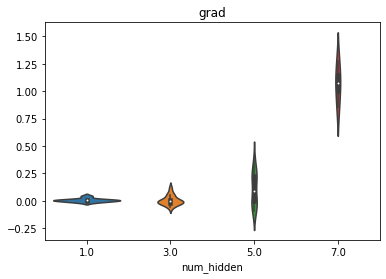

In [ ]:
weights_vp(sigmoid_model3,att="grad")

##**Tanh函数的梯度计算问题**

In [65]:
class tanh_class4(nn.Module):                                   
  def __init__(self, in_features=2, n_hidden1=4, n_hidden2=4, n_hidden3=4, n_hidden4=4, out_features=1):       
      super(tanh_class4, self).__init__()
      self.linear1 = nn.Linear(in_features, n_hidden1)
      self.linear2 = nn.Linear(n_hidden1, n_hidden2)
      self.linear3 = nn.Linear(n_hidden2, n_hidden3)
      self.linear4 = nn.Linear(n_hidden3, n_hidden4)
      self.linear5 = nn.Linear(n_hidden4, out_features) 
      
  def forward(self, x):          
      z1 = self.linear1(x)
      p1 = torch.tanh(z1)
      z2 = self.linear2(p1)
      p2 = torch.tanh(z2)
      z3 = self.linear3(p2)
      p3 = torch.tanh(z3)
      z4 = self.linear4(p3)
      p4 = torch.tanh(z4)
      out = self.linear5(p4)
      return out

In [81]:
torch.manual_seed(420)

tanh_model4 = tanh_class4()

In [ ]:
list(tanh_model4.modules())

In [83]:
for m in tanh_model4.modules():
  if isinstance(m,nn.Linear):
    print(m.weight)

Parameter containing:
tensor([[ 0.4318, -0.4256],
        [ 0.6730, -0.5617],
        [-0.2157, -0.4873],
        [ 0.5453,  0.2653]], requires_grad=True)
Parameter containing:
tensor([[-0.2552,  0.3644, -0.2104, -0.3271],
        [-0.1542, -0.4883, -0.2428, -0.2728],
        [ 0.1076,  0.4066,  0.0540, -0.2914],
        [ 0.2058, -0.2129, -0.2367, -0.0958]], requires_grad=True)
Parameter containing:
tensor([[ 3.0199e-01, -4.3436e-01, -3.9335e-01, -6.6525e-02],
        [ 4.5806e-04,  3.1209e-01, -4.3974e-01,  2.0861e-01],
        [-4.2916e-01,  8.0655e-02,  3.3044e-01,  6.8971e-02],
        [ 1.5964e-01,  3.1789e-01,  4.9465e-01, -3.1377e-01]],
       requires_grad=True)
Parameter containing:
tensor([[-0.3468, -0.4897,  0.2213,  0.4947],
        [-0.4843,  0.3998, -0.4678, -0.0610],
        [ 0.4057, -0.0786,  0.0555,  0.3645],
        [-0.4194,  0.1265, -0.2440,  0.4589]], requires_grad=True)
Parameter containing:
tensor([[-0.2952,  0.1712, -0.3926,  0.2928]], requires_grad=True)


In [84]:
train_l, test_l = model_train_test(tanh_model4, 
                   train_loader,
                   test_loader,
                   num_epochs = 5, 
                   criterion = nn.MSELoss(), 
                   optimizer = optim.SGD, 
                   lr = 0.03, 
                   cla = False, 
                   eva = mse_cal)

In [85]:
for m in tanh_model4.modules():
  if isinstance(m, nn.Linear):
    print(m.weight)

Parameter containing:
tensor([[ 1.4839, -1.2525],
        [ 0.0965, -0.3440],
        [-0.3401, -0.2464],
        [ 1.4738,  1.2353]], requires_grad=True)
Parameter containing:
tensor([[-1.2388,  0.3235, -0.3155,  0.5049],
        [ 0.1208, -0.2847, -0.1933, -0.4100],
        [ 0.6274,  0.5045,  0.1624, -0.6843],
        [ 1.3054, -0.2037, -0.1091, -1.4094]], requires_grad=True)
Parameter containing:
tensor([[ 0.6659, -0.2446, -0.8782, -1.0968],
        [-0.6992,  0.4826,  0.2194,  0.9251],
        [-0.4141,  0.1407,  0.2448,  0.0618],
        [ 0.5716,  0.3977, -0.0867, -1.0423]], requires_grad=True)
Parameter containing:
tensor([[-1.1501e-01, -7.5453e-01, -2.9874e-01,  7.9182e-01],
        [-8.2338e-01,  5.9934e-01, -8.6214e-02, -3.4317e-01],
        [ 1.2655e+00, -9.1910e-04, -3.4788e-01,  7.6040e-01],
        [-7.0988e-01,  4.2752e-01,  2.9324e-02,  1.5254e-01]],
       requires_grad=True)
Parameter containing:
tensor([[-2.0629,  1.4902, -2.3601,  0.5933]], requires_grad=True)


In [86]:
for m in tanh_model4.modules():
    if isinstance(m, nn.Linear):
        print(m.weight.grad)

tensor([[ 6.4397,  4.2417],
        [-0.5297, -0.5953],
        [ 0.0378,  0.1969],
        [-0.5715,  0.3275]])
tensor([[ 0.6898,  1.1730,  1.2211, -2.2291],
        [-0.2758, -0.3855, -0.3755,  0.7054],
        [ 0.3524, -0.6981, -0.9279,  1.3413],
        [ 0.7791, -1.2236, -1.7457,  2.5026]])
tensor([[ 0.8900,  0.1328,  0.6178,  0.0474],
        [ 1.4413, -0.5989, -1.8211, -2.0032],
        [ 0.2135, -0.1752, -0.5945, -0.5397],
        [-0.8026,  0.4465,  1.4125,  1.4063]])
tensor([[-2.3622,  1.1366,  0.7924, -1.3851],
        [ 1.2869, -0.4316, -0.3436,  0.5445],
        [-0.5565, -0.7401, -0.2579,  0.5970],
        [ 0.6996, -0.1631, -0.1567,  0.2371]])
tensor([[-0.9019, -0.8363,  1.5470, -0.7958]])


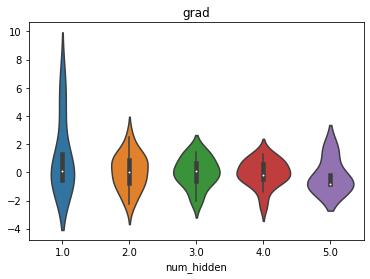

In [87]:
weights_vp(tanh_model4,att="grad")

In [95]:
torch.manual_seed(420)  

# 实例化模型
tanh_model4 = tanh_class4()


train_l, test_l = model_train_test(tanh_model4, 
                  train_loader,
                  test_loader,
                  num_epochs = 20, 
                  criterion = nn.MSELoss(), 
                  optimizer = optim.SGD, 
                  lr = 0.03, 
                  cla = False, 
                  eva = mse_cal)

In [96]:
for m in tanh_model4.modules():
    if isinstance(m, nn.Linear):
        print(m.weight.grad)

tensor([[-0.0170, -0.0103],
        [ 0.1094,  0.0081],
        [-0.0157,  0.0101],
        [-3.1891,  2.1460]])
tensor([[-3.2009e-02, -2.3869e-02, -3.5422e-02,  3.5327e-02],
        [ 3.4205e-01, -3.2467e-01,  3.4272e-01,  2.3019e-02],
        [ 1.6659e-02, -1.6419e-02,  1.6632e-02, -5.9128e-03],
        [ 5.1504e-05, -4.0607e-05,  5.2055e-05, -2.2655e-05]])
tensor([[ 6.0294e-05,  2.8228e-05, -6.0369e-05, -6.0741e-05],
        [ 2.3402e-01, -2.9510e-01, -2.3411e-01, -2.3402e-01],
        [-7.9437e-01, -7.3400e-01,  7.9809e-01,  8.0484e-01],
        [ 2.1566e-04,  2.1223e-04, -2.1656e-04, -2.1838e-04]])
tensor([[-4.8012e-01,  3.3204e-01,  4.8076e-01, -4.8009e-01],
        [-1.9925e-02, -1.9601e-02,  1.4374e-02, -1.9920e-02],
        [ 4.8017e-04,  1.0636e-03, -2.9823e-04,  4.7999e-04],
        [-1.1226e+00, -1.0629e+00,  8.9443e-01, -1.1223e+00]])
tensor([[ 0.2820,  0.2029, -0.2058, -0.2413]])


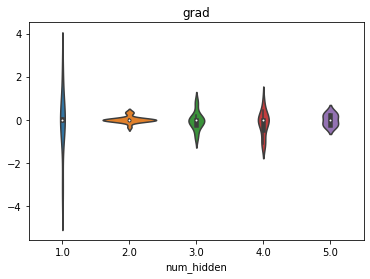

In [97]:
weights_vp(tanh_model4,att="grad")

整体来看，针对梯度不平稳的解决方案（优化方法）总共分为五类，分别是<font color="orange">参数初始化方法、输入数据的归一化方法、衍生激活函数使用方法、学习率调度方法以及梯度下降优化方法

能否创建初始值全为0的参数？

In [113]:
class Sigmoid_class1_test(nn.Module):
  def __init__(self,in_features=2,n_hidden=2,out_features=1,bias=False):
    super(Sigmoid_class1_test,self).__init__()
    self.linear1 = nn.Linear(in_features,n_hidden,bias=bias)
    self.linear2 = nn.Linear(n_hidden,out_features,bias=bias)

  def forward(self,x):
    z1 = self.linear1(x)
    p1 = torch.sigmoid(z1)
    out = self.linear2(p1)
    return out

In [114]:
torch.manual_seed(420)
sigmoid_test = Sigmoid_class1_test()

In [115]:
list(sigmoid_test.parameters())

[Parameter containing:
 tensor([[ 0.4318, -0.4256],
         [ 0.6730, -0.5617]], requires_grad=True), Parameter containing:
 tensor([[-0.2157, -0.4873]], requires_grad=True)]

In [125]:
list(sigmoid_test.parameters())[0].data = torch.tensor([[0.,0],[0.,0]])
list(sigmoid_test.parameters())[1].data = torch.tensor([[0.,0]])

In [126]:
list(sigmoid_test.parameters())

[Parameter containing:
 tensor([[0., 0.],
         [0., 0.]], requires_grad=True), Parameter containing:
 tensor([[0., 0.]], requires_grad=True)]

In [127]:
fit(
    net=sigmoid_test,
    criterion=nn.MSELoss(),
    optimizer=optim.SGD(sigmoid_test.parameters(),lr=0.03),
    batchdata=train_loader,
    epochs=5,
    cla=False
)

In [128]:
list(sigmoid_test.parameters()) # 每一行都是同步变化的

[Parameter containing:
 tensor([[0.1282, 0.1305],
         [0.1282, 0.1305]], requires_grad=True), Parameter containing:
 tensor([[0.8928, 0.8928]], requires_grad=True)]

&emsp;&emsp;<font color="orange">**而这种正向传播时数据方差保持一致、反向传播时参数梯度方差保持一致的条件，也被称为Glorot条件，满足该条件的模型能够进行有效平稳的训练，而为了满足该条件而创建的（当然也是由上述论文提出的）模型初始化参数值设计方法，也被称为Xavier方法。而在Xavier方法中，最核心解决的问题，也就是为了创建Zero-Centered的初始化参数时参数的方差。和我们从朴素的角度思考的方向是一致的。**

我们发现，初始参数值的选取不仅会影响模型收敛速度，甚至在某些情况下还会影响模型的最终表现。造成此现象的根本原因还是在于神经网络模型在进行训练时，不确定性过多，而在一个拥有诸多不确定性的系统中再加上不确定的初始参数，初始参数的不确定性会被这个系统放大。并且，值得一提的是，每一个epoch中的每一次迭代并不是在一个损失函数上一步步下降的，当我们使用小批量梯度下降算法时，带入不同批的数据，实际创建的损失函数也会不同。